In [1]:
import os
import requests
from pathlib import Path
import zipfile

### Data Ingestion and Unzipping

In [2]:
url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
save_dir = Path("../data/Deep_Learning")

os.makedirs(save_dir, exist_ok = True)

file_path = os.path.join(save_dir, "dataset.zip")

# Download the file
if not os.path.exists(path = save_dir):
    response = requests.get(url = url, stream = True)
    if response.status_code == 200:
        with open(file_path, "wb") as f:
            for chunk in response.iter_content(chunk_size = 8192):
                f.write(chunk)
        print(f"Dataset download successfully and saved to {file_path}.")
    else:
        print(f"Failed to download the dataset. HTTP status code: {response.status_code}")
else:
    print(f"Dataset is already downloaded at: {file_path}")

Dataset is already downloaded at: ..\data\Deep_Learning\dataset.zip


In [3]:
# Define the file path and the extraction directory
extract_dir = os.path.join(save_dir, "cats_and_dogs")

# Unzip the file
if not os.path.exists(extract_dir):
    with zipfile.ZipFile(file_path, "r") as zip_ref:
        zip_ref.extractall(path = extract_dir)
        print("Dataset successfully extracted!")
else:
    print("Extracted File already exists.")

Extracted File already exists.


### Uploading the Dataset to the S3

In [4]:
import boto3
import sagemaker

d:\Github Projects\Project\SageMaker-Project\.venv\Lib\site-packages\pydantic\_internal\_fields.py:192: UserWarning: Field name "json" in "MonitoringDatasetFormat" shadows an attribute in parent "Base"
  warnings.warn(


[01/04/25 13:14:22] INFO     Found credentials in shared credentials file: ~/.aws/credentials   credentials.py:1278

sagemaker.config INFO - Not applying SDK defaults from location: C:\ProgramData\sagemaker\sagemaker\config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: C:\Users\rahul\AppData\Local\sagemaker\sagemaker\config.yaml


In [ ]:
# Importing the necessary library to interact with AWS services
sm_boto3 = boto3.client("sagemaker", region_name = "ap-south-1")  # Initialize SageMaker client for the specified region

# Creating a SageMaker session object to handle interactions with the AWS SageMaker service
sess = sagemaker.Session()

# Fetching the region name from the session object, which provides the current AWS region
region = sess.boto_session.region_name

# Defining the name of the S3 bucket to be used for the project in SageMaker
bucket = "aws-sagemaker-project-2" # Enter the name of your S3 bucket here

# Printing the name of the bucket to confirm it will be used in subsequent operations
print(f"Using the Bucket: {bucket}")

[01/04/25 13:15:33] INFO     Found credentials in shared credentials file: ~/.aws/credentials   credentials.py:1278

Using the Bucket: aws-sagemaker-project-2


In [6]:
# send data to s3. SageMaker will take training data from s3
train_prefix = "sagemaker/DL/torch_container/train"
test_prefix = "sagemaker/DL/torch_container/test"

# Uploading the training data CSV file to S3
train_path = sess.upload_data(
    path = Path("../data/Deep_Learning/cats_and_dogs/cats_and_dogs_filtered/train"),  # Path to the local training data file
    bucket = bucket,         # Name of the S3 bucket where the data will be uploaded
    key_prefix = train_prefix   # S3 key prefix for the uploaded data
)

# Uploading the testing data CSV file to S3
test_path = sess.upload_data(
    path = Path("../data/Deep_Learning/cats_and_dogs/cats_and_dogs_filtered/validation"),   # Path to the local testing data file
    bucket = bucket,         # Name of the S3 bucket where the data will be uploaded
    key_prefix = test_prefix   # S3 key prefix for the uploaded data
)

In [7]:
print(train_path)
print(test_path)

s3://aws-sagemaker-project-2/sagemaker/DL/torch_container/train
s3://aws-sagemaker-project-2/sagemaker/DL/torch_container/test


### Data Exploration

In [8]:
base_dir = Path("../data/Deep_Learning/cats_and_dogs/cats_and_dogs_filtered")

print("Contents of base directory: ")
print(os.listdir(base_dir))

print("Contents of Train directory: ")
print(os.listdir(f"{base_dir}/train"))

print("Contents of Validation directory: ")
print(os.listdir(f"{base_dir}/validation"))

Contents of base directory: 
['train', 'validation', 'vectorize.py']
Contents of Train directory: 
['cats', 'dogs']
Contents of Validation directory: 
['cats', 'dogs']


Defining the names of the folders using the os library.

In [9]:
train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "validation")

train_dogs_dir = os.path.join(train_dir, "dogs")
train_cats_dir = os.path.join(train_dir, "cats")

validation_dogs_dir = os.path.join(validation_dir, "dogs")
validation_cats_dir = os.path.join(validation_dir, "cats")

In [10]:
train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

In [11]:
print("Total training dog images: ", len(os.listdir(train_dogs_dir)))
print("Total training cat images: ", len(os.listdir(train_cats_dir)))

print("Total validation dog images: ",len(os.listdir(validation_dogs_dir)))
print("Total validation cat images: ",len(os.listdir(validation_cats_dir)))

Total training dog images:  1000
Total training cat images:  1000
Total validation dog images:  500
Total validation cat images:  500


In [12]:
# To get the size of the images
from PIL import Image

In [13]:
image_dir = os.path.join(base_dir, "train", "cats")

for i, img_name in enumerate(os.listdir(image_dir)):
    img_path = os.path.join(image_dir, img_name)
    try:
        if i < 5:
            with Image.open(img_path) as img:
                print(f"Image name: {img_name}, Image size: {img.size}")
                i += 1
        else:
            break
    except Exception as e:
        print(f"Could not process {img_name}: {e}")

Image name: cat.0.jpg, Image size: (500, 374)
Image name: cat.1.jpg, Image size: (300, 280)
Image name: cat.10.jpg, Image size: (489, 499)
Image name: cat.100.jpg, Image size: (403, 499)
Image name: cat.101.jpg, Image size: (296, 200)


### Visualization

In [14]:
# Libraries to visualizze the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

<Figure size 1600x1600 with 0 Axes>

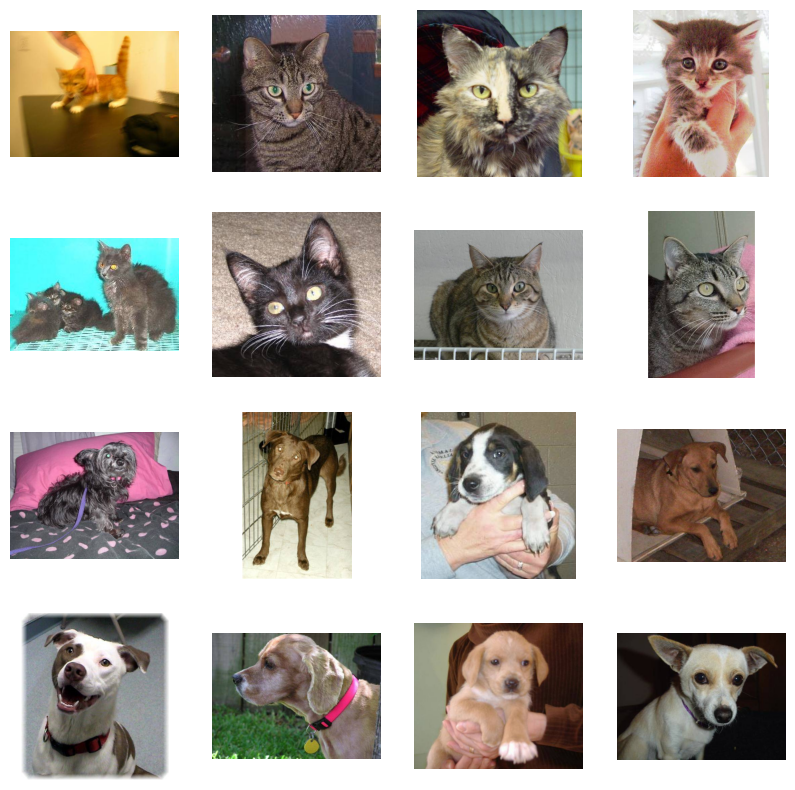

In [ ]:
# Number of columns and rows
nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

# Visualiznig 8 images from each category
pic_index += 8
next_cat_pic = [os.path.join(train_cats_dir, fname) for fname in train_cat_fnames[pic_index-8: pic_index]]
next_dog_pic = [os.path.join(train_dogs_dir, fname) for fname in train_dog_fnames[pic_index-8: pic_index]]

plt.figure(figsize = (10, 10))
for i, img_path in enumerate(next_cat_pic + next_dog_pic):

  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis("off")

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

### Training script for the SagMaker

We will pass this file only.
Thus, all the operations will be done in this file only like Custom Dataset, creating the DataLoader for the training and test dataset, Model Creation.

In [60]:
%%writefile script.py

import os
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms, datasets, models
from torch.utils.data import DataLoader
import s3fs
from sagemaker import get_execution_role
from PIL import Image

# Hyperparameters
BATCH_SIZE = 32
LEARNING_RATE = 1e-4
EPOCHS = 1

# Setting up data transformations
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225])
])

# Custom dataset class to directly read images from S3
class S3Dataset(torch.utils.data.Dataset):
    def __init__(self, s3_path, transform = None):
        self.s3_path = s3_path
        self.transform = transform
        self.s3fs = s3fs.S3FileSystem()
        self.image_paths = [path for path in self.s3fs.glob(f"{s3_path}/**/*.jpg")]

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        with self.s3fs.open(image_path, "rb") as f:
            image = Image.open(f)
            if self.transform:
                image = self.transform(image)
        label = 0 if "cat" in image_path else 1
        return image, label

train_path = "s3://aws-sagemaker-project-2/sagemaker/DL/torch_container/train"
test_path = "s3://aws-sagemaker-project-2/sagemaker/DL/torch_container/test"

# Load training data from S3 using the custom dataset
train_dataset = S3Dataset(train_path, transform = transform)
train_loader = DataLoader(train_dataset, batch_size = BATCH_SIZE, shuffle = True)

# Load test data from S3 using the custom dataset
test_dataset = S3Dataset(test_path, transform = transform)
test_loader = DataLoader(test_dataset, batch_size = BATCH_SIZE, shuffle = False)

# Initialize pre-trained model
model = models.resnet50(weights = models.ResNet50_Weights.IMAGENET1K_V1)
for param in model.parameters():
    param.requires_grad = False

# Modify the final fully connected layer for binary classification (2 classes: Cats, Dogs)
model.fc = nn.Linear(model.fc.in_features, 2)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.fc.parameters(), lr = LEARNING_RATE)

# Device configuration (use GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Training loop
for epoch in range(EPOCHS):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f"Epoch [{epoch+1}/{EPOCHS}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {100 * correct / total:.2f}%")

# Save the model to S3
fs = s3fs.S3FileSystem()

s3_model_path = "s3://aws-sagemaker-project-2/sagemaker/DL/torch_container/model.pth"
with fs.open(s3_model_path, "wb") as f:
    torch.save(model.state_dict(), f)

print(f"Model saved to {s3_model_path}")

# Evaluation loop
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")


Overwriting script.py


In [58]:
import sagemaker
from sagemaker.pytorch import PyTorch

FRAMEWORK_VERSION = "2.5.1"
role = "###"

# Creating the Torch estimator to run the training job
torch_estimator = PyTorch(
    entry_point = "script.py",
    role = role,
    instance_count = 1,
    instance_type = "ml.m5.large",
    framework_version = FRAMEWORK_VERSION,
    py_version = "py311",
    base_job_name = "CNN-Torch",
    hyperparameters={
        "batch_size": 32,
        "learning_rate": 1e-4,
        "epochs": 1
    },
    use_spot_instances = True,
    max_wait = 7200,
    max_run = 3600
)

In [59]:
# Start the training job using the estimator
torch_estimator.fit(
    {
        "train": train_path,   # Path to the train data on S3
        "test": test_path   # Path to the test data on S3
    },
    wait = True
)

[01/04/25 15:05:19] INFO     SageMaker Python SDK will collect telemetry to help us better  telemetry_logging.py:90
                             understand our user's needs, diagnose issues, and deliver                             
                             additional features.                                                                  
                             To opt out of telemetry, please disable via TelemetryOptOut                           
                             parameter in SDK defaults config. For more information, refer                         
                             to                                                                                    
                             https://sagemaker.readthedocs.io/en/stable/overview.html#confi                        
                             guring-and-using-defaults-with-the-sagemaker-python-sdk.                              

[01/04/25 15:05:25] INFO     image_uri is not presented, retrieving image_uri based on            image_uris.py:679
                             instance_type, framework etc.                                                         

                    INFO     Creating training-job with name: CNN-Torch-2025-01-04-20-05-19-942     session.py:1042

2025-01-04 20:05:29 Starting - Starting the training job...
2025-01-04 20:05:42 Starting - Preparing the instances for training...
2025-01-04 20:06:08 Downloading - Downloading input data...
2025-01-04 20:07:14 Downloading - Downloading the training image......
2025-01-04 20:08:15 Training - Training image download completed. Training in progress..bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2025-01-04 20:08:19,385 sagemaker-training-toolkit INFO     Imported framework sagemaker_pytorch_container.training
2025-01-04 20:08:19,386 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2025-01-04 20:08:19,387 sagemaker-training-toolkit INFO     No Neurons detected (normal if no neurons installed)
2025-01-04 20:08:19,399 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2025-01-04 20:08:19,402 sagemaker_pytorch_container.training INFO     Invoking user traini